## 使用CV2来实现图像识别

#### cv2 documents: https://opencv.apachecn.org/#/docs/4.0.0/10.1-tutorial_py_face_detection

In [6]:
import os
import cv2 
import math
import pandas as pd
import numpy as np
import glob 

from scipy.linalg import svd
from numpy import linalg as LA
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
%matplotlib inline

In [7]:
# tf.enable_eager_execution()

In [8]:
path = glob.glob("E:/face_dectection/emotion/*/*.jpg")
writepath = "E:/face_dectection/dected_emotion/"

In [9]:
print(len(path))
print(path[0:10])

2016
['E:/face_dectection/emotion\\anger\\recgonize_anger1.jpg', 'E:/face_dectection/emotion\\anger\\recgonize_anger10.jpg', 'E:/face_dectection/emotion\\anger\\recgonize_anger100.jpg', 'E:/face_dectection/emotion\\anger\\recgonize_anger101.jpg', 'E:/face_dectection/emotion\\anger\\recgonize_anger102.jpg', 'E:/face_dectection/emotion\\anger\\recgonize_anger103.jpg', 'E:/face_dectection/emotion\\anger\\recgonize_anger104.jpg', 'E:/face_dectection/emotion\\anger\\recgonize_anger105.jpg', 'E:/face_dectection/emotion\\anger\\recgonize_anger106.jpg', 'E:/face_dectection/emotion\\anger\\recgonize_anger107.jpg']


In [20]:
# Rading dataset
gray_img = []
count=0
for img in path:
    try:
        gray = cv2.imread(img)
        gray = cv2.cvtColor(gray,cv2.COLOR_BGR2GRAY)
        gray = cv2.resize(gray,(1280,900))
    except:
        gray=np.zeros((1280,900))
        continue
    gray_img.append(gray)
    count+=1 

In [21]:
print(count)
print(len(gray_img))

1847
1847


In [13]:
image.shape

(1439, 1080, 3)

In [ ]:
help(cv2.CascadeClassifier)

In [ ]:
### deal one picture for test

Found 1 faces!


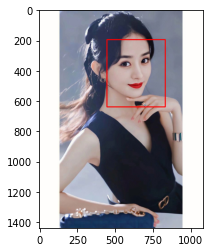

In [15]:
#load the model that have equppied in the cv2
#here must use absolute path
abs_path="E:/360downloads/Lib/site-packages/cv2/data/"
faceCascade = cv2.CascadeClassifier(abs_path+"haarcascade_frontalface_default.xml")
#
imagePath = "E:/face_dectection/figure/person0/page0_the_10_zhaoliyin.jpg"
image = cv2.imread(imagePath)

# # Detect faces in the image
faces = faceCascade.detectMultiScale(
    image,
    scaleFactor=2,
    minNeighbors=5
)
if len(faces) == 1:
    print("Found {} faces!".format(len(faces)))

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h+60), (0, 0, 255), 5)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [27]:
path[1]

'E:/face_dectection/emotion\\anger\\recgonize_anger10.jpg'

In [30]:
help(np.ix_)

Help on function ix_ in module numpy:

ix_(*args)
    Construct an open mesh from multiple sequences.
    
    This function takes N 1-D sequences and returns N outputs with N
    dimensions each, such that the shape is 1 in all but one dimension
    and the dimension with the non-unit shape value cycles through all
    N dimensions.
    
    Using `ix_` one can quickly construct index arrays that will index
    the cross product. ``a[np.ix_([1,3],[2,5])]`` returns the array
    ``[[a[1,2] a[1,5]], [a[3,2] a[3,5]]]``.
    
    Parameters
    ----------
    args : 1-D sequences
        Each sequence should be of integer or boolean type.
        Boolean sequences will be interpreted as boolean masks for the
        corresponding dimension (equivalent to passing in
        ``np.nonzero(boolean_sequence)``).
    
    Returns
    -------
    out : tuple of ndarrays
        N arrays with N dimensions each, with N the number of input
        sequences. Together these arrays form an open mesh.

In [ ]:
abs_path="E:/360downloads/Lib/site-packages/cv2/data/"
faceCascade = cv2.CascadeClassifier(abs_path+"haarcascade_frontalface_default.xml")


ind = 0;
for im in path:

    #image = gray_img[ind]
    image = cv2.imread(im)     
    # Detect faces in the image
    faces = faceCascade.detectMultiScale(image,scaleFactor=1.2,minNeighbors=5)

#     # Draw a rectangle around the faces
    if len(faces)==0:
        continue
    for (x, y, w, h) in faces:
#         cv2.rectangle(image, (x, y), (x+w, y+h+60), (0, 0, 255), 5)
        pass
        

    ax = list(range(x,x+w))
    ay = list(range(y,y+h))
    img = image[np.ix_(ay,ax)]
    cv2.imwrite(writepath+im,img)
    ind = ind+1